In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [23]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate 1000 samples
n_samples = 1000
data = {
    'diet': np.random.choice(['vegan', 'vegetarian', 'omnivore'], n_samples),
    'transport_mode': np.random.choice(['car', 'public', 'walking'], n_samples),
    'transport_distance_km': np.random.uniform(0, 100, n_samples),  # 0-100 km/week
    'electricity_kwh': np.random.uniform(10, 100, n_samples)  # 10-100 kWh/week
}
df = pd.DataFrame(data)

# Map diet to CO2 factors
diet_co2 = {'vegan': 0.5, 'vegetarian': 1.0, 'omnivore': 2.0}
df['diet_co2'] = df['diet'].map(diet_co2)

# Map transport mode to CO2 factors
transport_co2 = {'car': 0.2, 'public': 0.1, 'walking': 0.0}
df['transport_co2_factor'] = df['transport_mode'].map(transport_co2)

# Calculate weekly CO2 (kg): diet + transport + electricity
df['co2_kg'] = (
    df['diet_co2'] * 7 +  # Assume diet impact is daily, scale to weekly
    df['transport_co2_factor'] * df['transport_distance_km'] +  # Transport emissions
    0.5 * df['electricity_kwh']  # Electricity emissions
)

# Features and target
X = df[['diet_co2', 'transport_distance_km', 'transport_co2_factor', 'electricity_kwh']]
y = df['co2_kg']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_pred = model.predict(X_test_scaled)

In [28]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f} kg² CO2")

Mean Squared Error: 6.03 kg² CO2


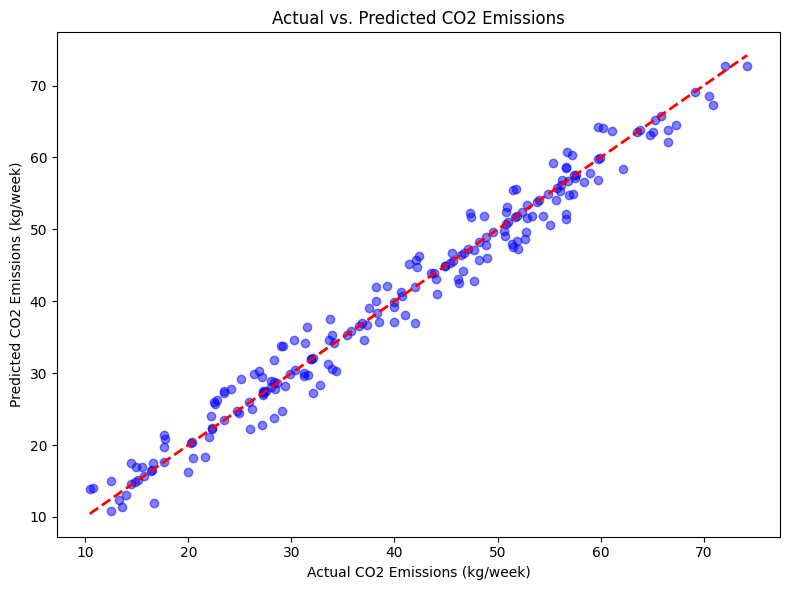

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual CO2 Emissions (kg/week)')
plt.ylabel('Predicted CO2 Emissions (kg/week)')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.tight_layout()
plt.show()

Random Forest MSE: 3.05 kg² CO2


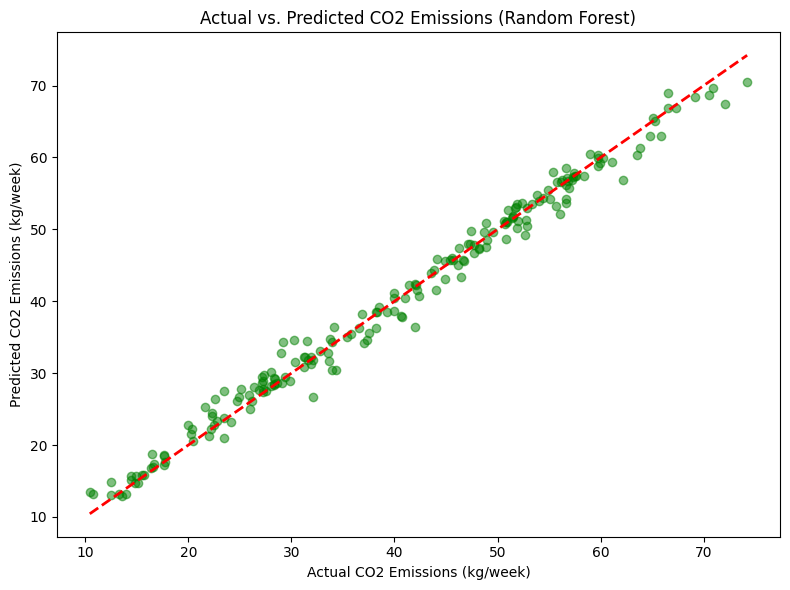

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.2f} kg² CO2")

# Visualize Random Forest results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual CO2 Emissions (kg/week)')
plt.ylabel('Predicted CO2 Emissions (kg/week)')
plt.title('Actual vs. Predicted CO2 Emissions (Random Forest)')
plt.tight_layout()
plt.show()